### Iris Flower Classification

Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('./IRIS.csv')

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Getting necessary information about the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking missing values in each column of dataframe.

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
import seaborn as sns

Plotting count of various species

<Axes: xlabel='species', ylabel='count'>

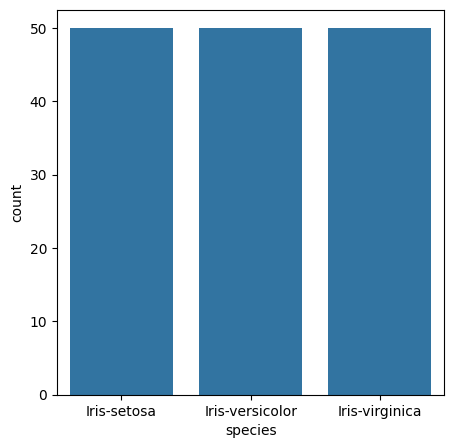

In [12]:
plot = plt.figure(figsize=(5,5))
sns.countplot(x='species',data=data)

In [13]:
data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

C:\Users\rusha\AppData\Local\Temp\ipykernel_7412\3570322813.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)


<Axes: >

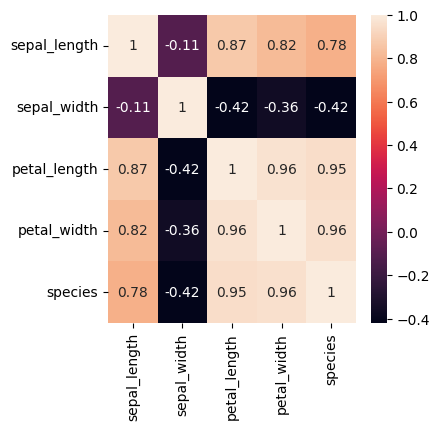

In [15]:
#Plotting the correlation matrix
plt.figure(figsize=(4,4)) 
sns.heatmap(data.corr(),annot=True)

Training machine learning model and splitting dataset into train and test subset

In [16]:
X=data.drop(columns='species')
Y=data['species']
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)
x_train

,sepal_length,sepal_width,petal_length,petal_width
77,6.7,3.0,5.0,1.7
114,5.8,2.8,5.1,2.4
110,6.5,3.2,5.1,2.0
139,6.9,3.1,5.4,2.1
39,5.1,3.4,1.5,0.2
...,...,...,...,...
45,4.8,3.0,1.4,0.3
118,7.7,2.6,6.9,2.3
41,4.5,2.3,1.3,0.3
127,6.1,3.0,4.9,1.8


#### Using various classification algorithms

Logistic Regression

In [18]:
#1.Logistic regression
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression() 
logreg.fit(x_train,y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score 

In [21]:
x_train_prediction=logreg.predict(x_train) 
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
x_test_prediction=logreg.predict(x_test) 
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9703703703703703
accuracy on test data: 0.9333333333333333


Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier().fit(x_train,y_train)

In [24]:
x_train_prediction=dtc.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
x_test_prediction=dtc.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 1.0
accuracy on test data: 0.9333333333333333


k nearest neighbour

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier() 
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
x_train_prediction=knn.predict(x_train)
training_Data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_data_accuracy)
x_test_prediction=knn.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 1.0
accuracy on test data: 0.9333333333333333


Naive bayes algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB() 
gnb.fit(x_train,y_train)

GaussianNB()

In [29]:
x_train_prediction=gnb.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
x_test_prediction=gnb.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9629629629629629
accuracy on test data: 0.9333333333333333


SVM 

In [30]:
from sklearn import svm
svm=svm.SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [31]:
x_train_prediction=svm.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)
x_test_prediction=svm.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9925925925925926
Accuracy on test data: 0.9333333333333333


In [32]:
x_test.head(10)

,sepal_length,sepal_width,petal_length,petal_width
106,4.9,2.5,4.5,1.7
98,5.1,2.5,3.0,1.1
113,5.7,2.5,5.0,2.0
37,4.9,3.1,1.5,0.1
53,5.5,2.3,4.0,1.3
8,4.4,2.9,1.4,0.2
43,5.0,3.5,1.6,0.6
102,7.1,3.0,5.9,2.1
56,6.3,3.3,4.7,1.6
148,6.2,3.4,5.4,2.3


In [33]:
input_data=(5.7,2.5,5.0,2.0) 
input_data_as_numpy_array=np.asarray(input_data)

In [34]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [35]:
print('Prediction Model    |    PredictedValues')
prediction=logreg.predict(input_data_reshaped)
print('Logistic regression       ',prediction[0])
prediction=dtc.predict(input_data_reshaped)
print('Decision tree             ',prediction[0])
prediction=knn.predict(input_data_reshaped)
print('Knn                       ',prediction[0])
prediction=gnb.predict(input_data_reshaped)
print('Gnb                       ',prediction[0])
prediction=svm.predict(input_data_reshaped)
print('Svm                       ',prediction[0])

Prediction Model    |    PredictedValues
Logistic regression        2
Decision tree              2
Knn                        2
Gnb                        2
Svm                        2


C:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\rusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, bu

In [36]:
y_test.head(10)

106    2
98     1
113    2
37     0
53     1
8      0
43     0
102    2
56     1
148    2
Name: species, dtype: int64